# Principal Component Analysis

## import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [3]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print(feature.shape)

(50, 2)


## plot the input data

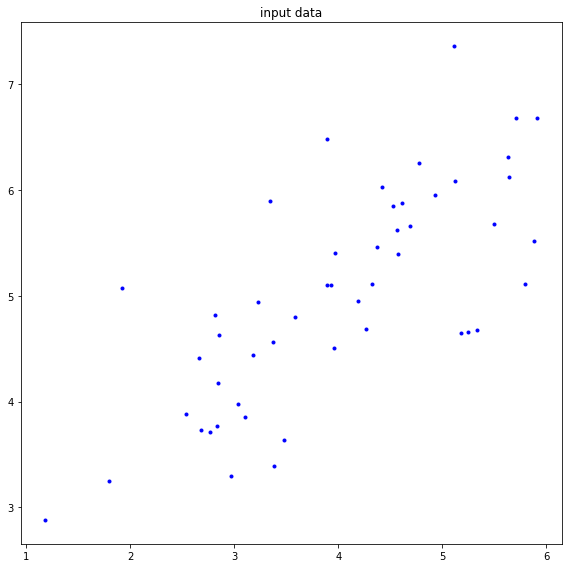

In [4]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x, y, '.', color = 'blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

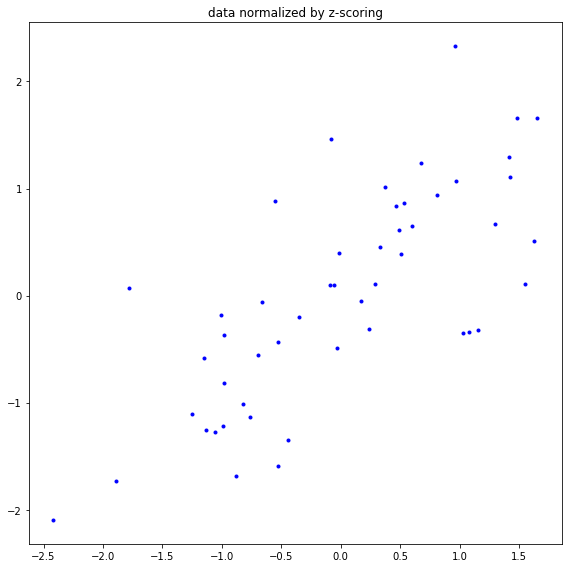

In [5]:
plt.figure(figsize=(8,8))
plt.title('data normalized by z-scoring')

feature = (feature - feature.mean(axis = 0)) / feature.std(axis = 0)

x = feature[:,0]
y = feature[:,1]


plt.plot(x, y, '.', color = 'blue')

plt.tight_layout()
plt.show()

In [6]:
print(np.mean(feature[:,0]))
print(np.mean(feature[:,1]))
print(np.std(feature[:,0]))
print(np.std(feature[:,1]))

1.0014211682118912e-15
3.8635761256955447e-16
0.9999999999999998
0.9999999999999999


## compute covariance matrix

In [7]:
def compute_covariance(feature):
    
    Sigma = np.cov(feature.T)
    
    return Sigma

In [79]:
print(feature.shape)
XX = compute_covariance(feature)
print(XX)
print(XX.shape)

(50, 2)
[[1.02040816 0.75054082]
 [0.75054082 1.02040816]]
(2, 2)


## compute principal directions

In [80]:
def compute_eigen(X):
    
    eigen_val, eigen_vec = np.linalg.eig(X)
    
    value = eigen_val
    vector = eigen_vec
    
    return value, vector

In [81]:
compute_eigen(XX)

(array([1.77094898, 0.26986734]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

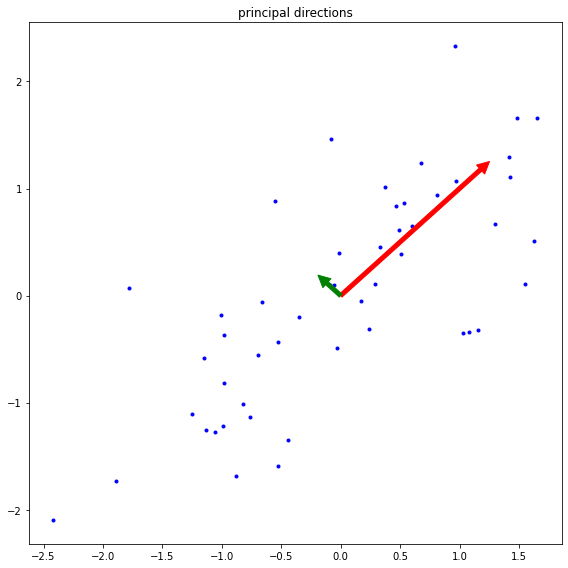

In [119]:
plt.figure(figsize=(8,8))
plt.title('principal directions')

plt.plot(x, y, '.', color = 'blue')

eigen_val,eigen_vec = compute_eigen(XX)

eigen_vec.reshape(2,2)

v1 = eigen_vec[:,0]
v2 = eigen_vec[:,1]

eig_vec1 = eigen_vec[:,0] * eigen_val[0]
eig_vec2 = eigen_vec[:,1] * eigen_val[1]

plt.annotate('', xy = (eig_vec1), xytext = (0,0), arrowprops = {'color':'red'})
plt.annotate('', xy = (eig_vec2), xytext = (0,0), arrowprops = {'color':'green'} )


plt.tight_layout()
plt.show()

In [115]:
print(eigen_vec[:,0])
print(eigen_vec[0])
print(eigen_vec[:,1])
print(eigen_vec[1])

[0.70710678 0.70710678]
[ 0.70710678 -0.70710678]
[-0.70710678  0.70710678]
[0.70710678 0.70710678]


## first principal axis

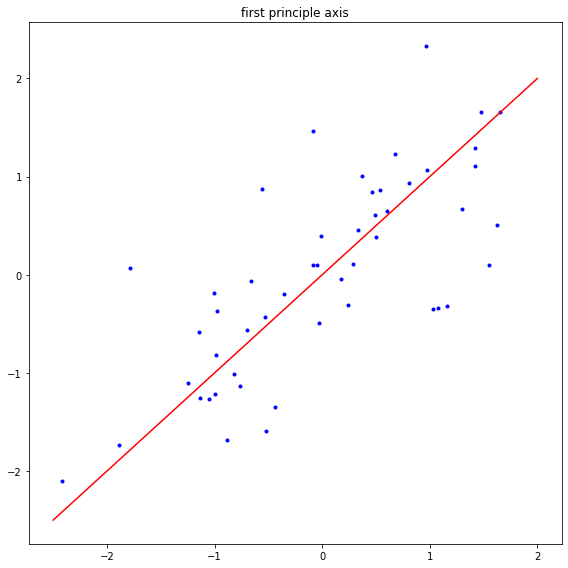

In [153]:
plt.figure(figsize=(8,8))
plt.title('first principle axis')

plt.plot(x, y, '.', color = 'blue')


xx = np.linspace(-2.5, 2, 50)
yy = (eigen_vec[0,0]/eigen_vec[1,0]) * xx

plt.plot(xx,yy,'-',color = 'red')

plt.tight_layout()
plt.show()

## second principal axis

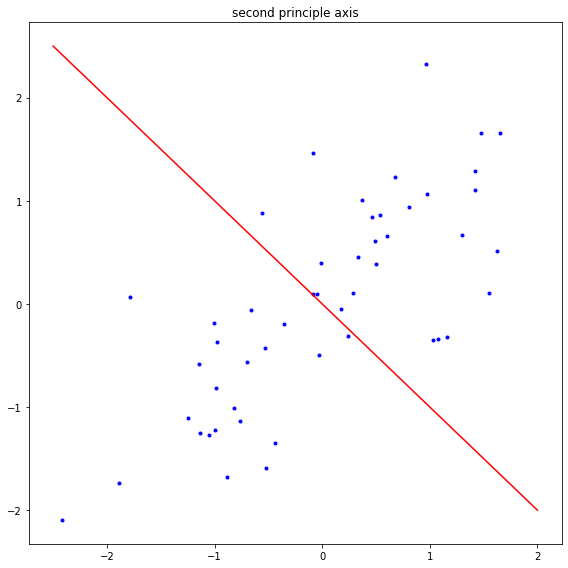

In [151]:
plt.figure(figsize=(8,8))
plt.title('second principle axis')

plt.plot(x, y, '.', color = 'blue')

n = feature.shape[0]
xx = np.linspace(-2.5, 2, n)
yy = (eigen_vec[0,1]/eigen_vec[1,1]) * xx

plt.plot(xx,yy,'-',color = 'red')

plt.tight_layout()
plt.show()

In [162]:
print(feature.shape)
print(feature)


(50, 2)
[[-0.5233151  -1.59279489]
 [ 0.46381907  0.84034673]
 [-1.14839444 -0.58316356]
 [-1.0540573  -1.27072124]
 [-0.98402134 -0.8165806 ]
 [-0.0849036   1.46633237]
 [-0.4421533  -1.35221189]
 [ 1.65512791  1.65623047]
 [-0.05199109  0.09440519]
 [ 0.49306315  0.61245716]
 [ 0.50359481  0.38972985]
 [ 0.32935312  0.45242712]
 [ 0.17431471 -0.04749279]
 [ 1.08057125 -0.33689517]
 [-0.99325269 -1.21879266]
 [ 1.41742932  1.29234548]
 [ 0.60026562  0.65385394]
 [-0.98061987 -0.37147145]
 [ 0.96523968  2.32982142]
 [ 1.02758572 -0.35168114]
 [ 1.47948257  1.65649698]
 [-0.3527074  -0.1974352 ]
 [ 1.42096858  1.10315805]
 [ 0.23612685 -0.30931705]
 [-1.25100707 -1.10383121]
 [-0.65914163 -0.05946567]
 [ 0.80965876  0.93988062]
 [ 1.55322141  0.10421644]
 [-1.00960561 -0.18146477]
 [-0.08649669  0.09630032]
 [-0.55632233  0.87867379]
 [ 1.62794193  0.51189675]
 [-0.76240011 -1.13086645]
 [ 1.15585151 -0.3178945 ]
 [-0.52859385 -0.43176032]
 [ 0.678069    1.2353336 ]
 [-1.1311115  -1.255

## compute the projection of point onto the line

In [165]:
def compute_projection_onto_line(feature, vector):
    
    n = feature.shape[0]
    
    temp = feature.dot(vector).reshape(50,1)
    
    revec = vector.reshape(1,2)
    
    projection = temp.dot(revec)
    
    return projection

## projcet to the first principal axis

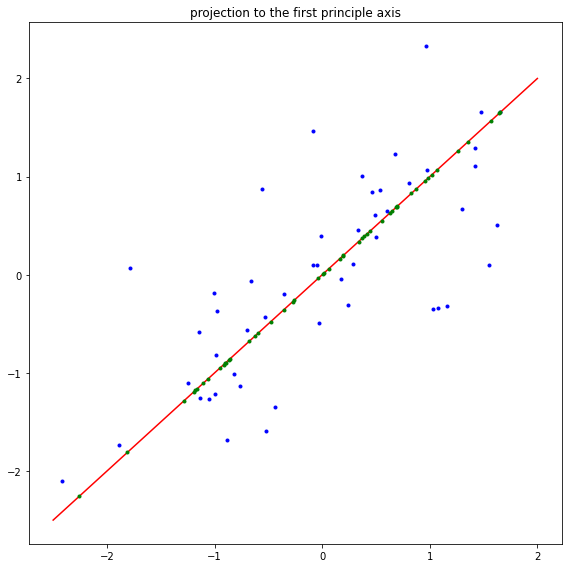

In [179]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')

plt.plot(x, y, '.', color = 'blue')

n = feature.shape[0]
xx = np.linspace(-2.5, 2, n)
yy = (eigen_vec[0,0]/eigen_vec[1,0]) * xx

plt.plot(xx,yy,'-',color = 'red')

projectedX2 = feature.dot(eigen_vec[:,0]).reshape(50,1)

k = eigen_vec[:,0].reshape(1,2)
L = projectedX2.dot(k) 

KK = np.sort(L, axis = 0)

plt.plot(KK[:,0],KK[:,1], '.', color = 'green')

plt.tight_layout()
plt.show()

## projcet to the second principal axis

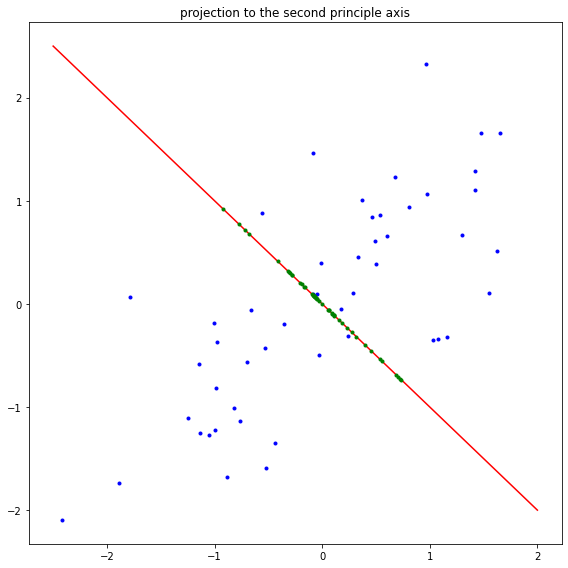

In [184]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')

plt.plot(x, y, '.', color = 'blue')

n = feature.shape[0]
xx = np.linspace(-2.5, 2, n)
yy = (eigen_vec[0,1]/eigen_vec[1,1]) * xx

plt.plot(xx,yy,'-',color = 'red')

projectedX2 = feature.dot(eigen_vec[:,1]).reshape(50,1)

k = eigen_vec[:,1].reshape(1,2)
L = projectedX2.dot(k) 

plt.plot(L[:,0],L[:,1], '.', color = 'green')

plt.tight_layout()
plt.show()

## connect original data to the projection onto the first principal axis

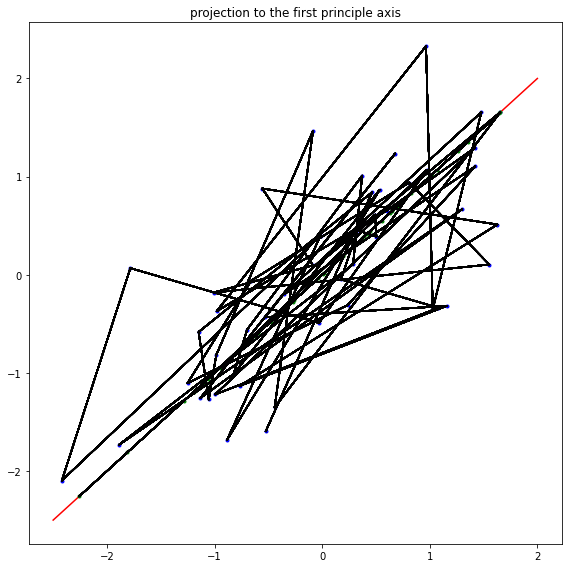

In [224]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')

plt.plot(x, y, '.', color = 'blue')

n = feature.shape[0]
xx = np.linspace(-2.5, 2, n)
yy = (eigen_vec[0,0]/eigen_vec[1,0]) * xx

plt.plot(xx,yy,'-',color = 'red')

projectedX2 = feature.dot(eigen_vec[:,0]).reshape(50,1)

k = eigen_vec[:,0].reshape(1,2)
L = projectedX2.dot(k) 


plt.plot(L[:,0],L[:,1], '.', color = 'green')

XX = np.concatenate((feature[:,0], L[:,0]), axis = None)
YY = np.concatenate((feature[:,1], L[:,1]), axis = None)

for i in range(n):
    plt.plot(XX,YY, '-', color = 'black')

    
plt.tight_layout()
plt.show()

## connect original data to the projection onto the second principal axis

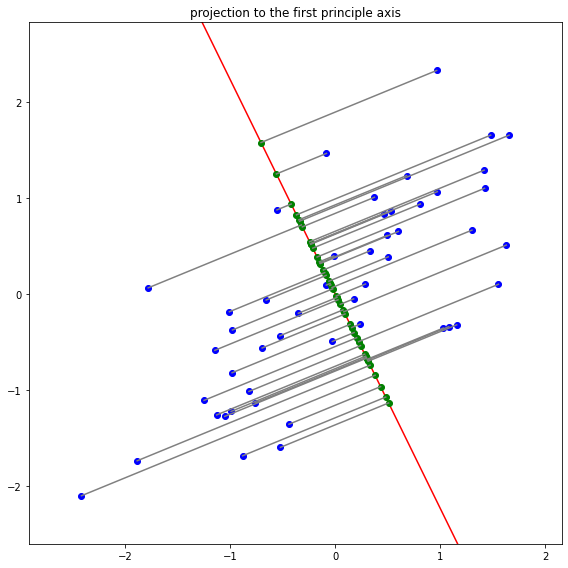

In [25]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')
# ===================================================
# fill up the blank
#
#
# ===================================================
plt.tight_layout()
plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

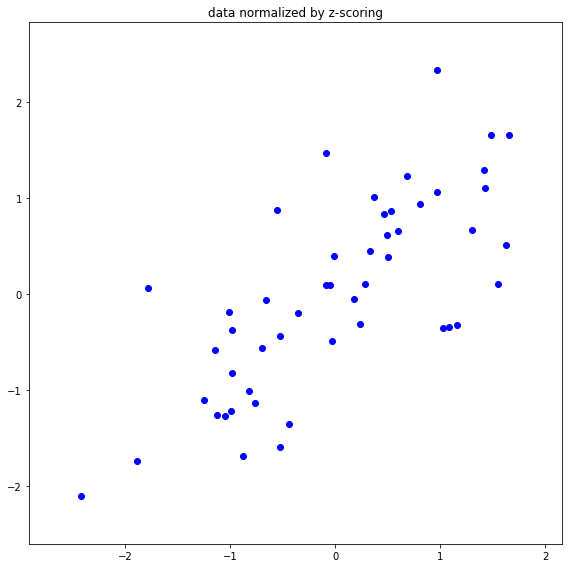

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

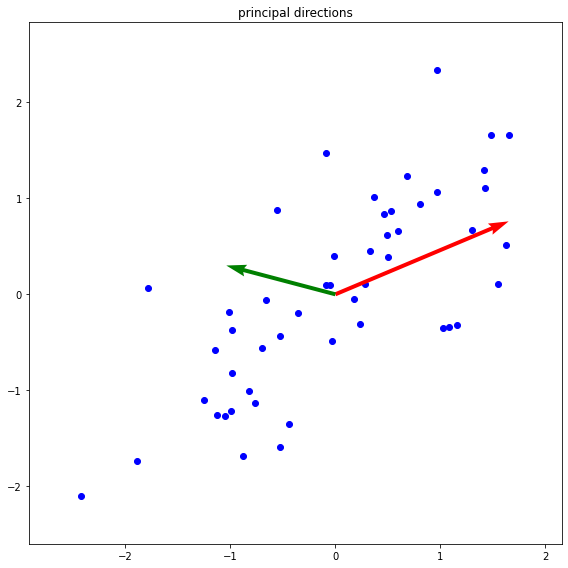

***

### 3. plot the first principal axis in red on the normalized data in blue

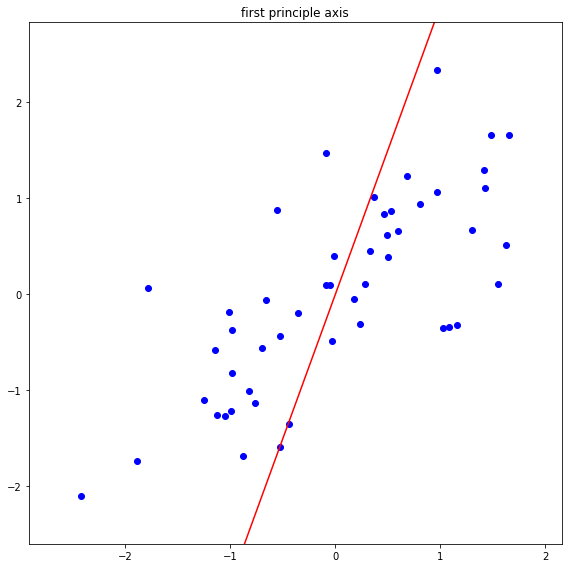

***

### 4. plot the second principal axis in red on the normalized data in blue

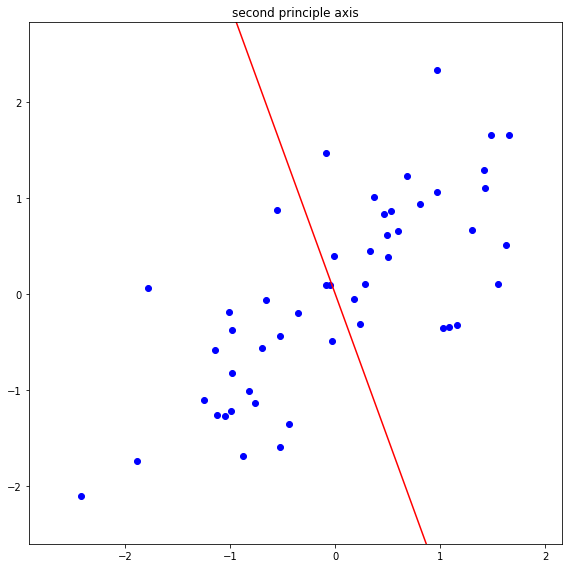

***

### 5. plot the projection of data in green onto the first principal axis in red

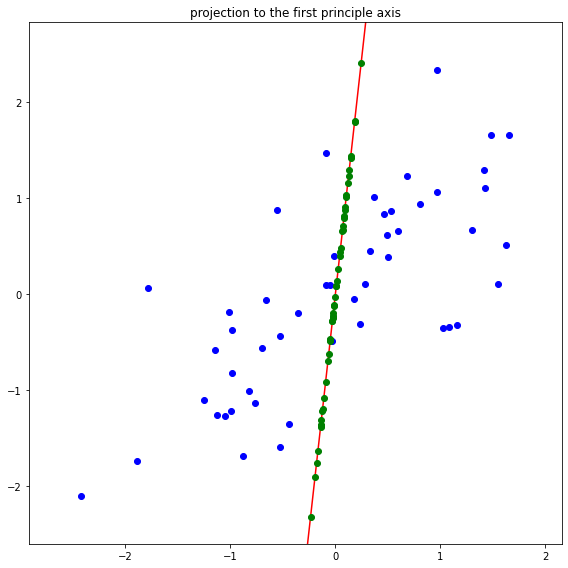

***

### 6. plot the projection of data in green onto the second principal axis in red

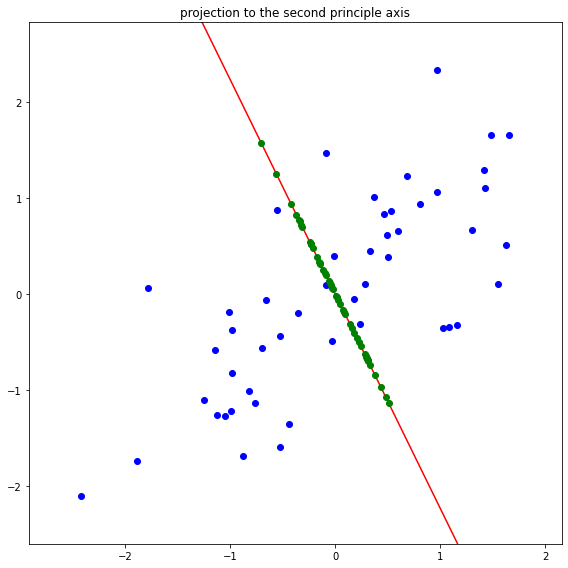

***

### 7. plot the projection line in grey onto the first principal axis

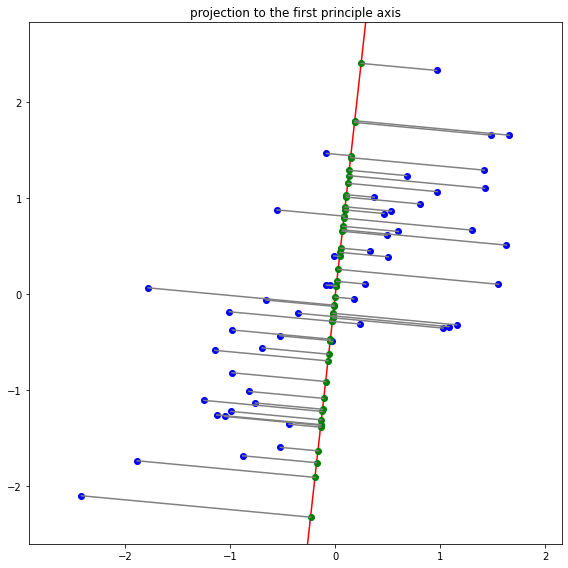

***

### 8. plot the projection line in grey onto the second principal axis

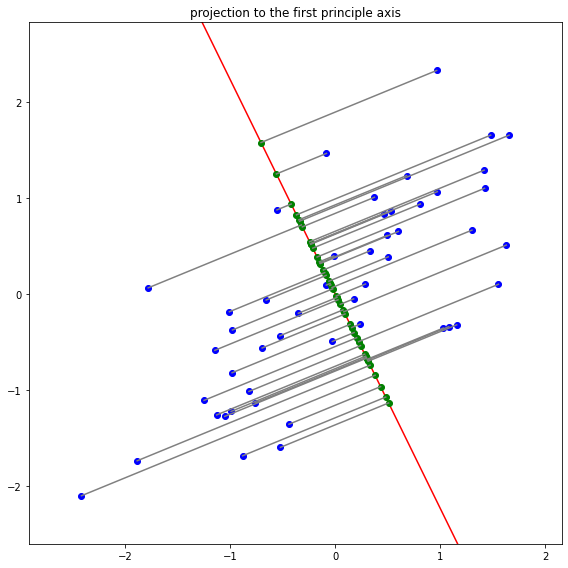

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***